In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS

### RSA For Hippocampal connections in the brain


In [25]:
df_female = pd.read_excel('../data/br2f_topographic_data.xlsx', header=0, index_col=0)

# define left hemisphere
brain_regions = df_female.index.to_numpy()
left_hemisphere = brain_regions[:392]
df_left_hemisphere = df_female[left_hemisphere]
df_left_hemisphere = df_left_hemisphere.head(392)

df_female_lh = df_female.iloc[:392,:392]
df_female_rh = df_female.iloc[392:,392:]
df_female_rh.columns = df_female_rh.columns.str.replace(r'\.1$', '', regex=True)

hippocampus_regions = np.array(['DG','CA3','CA2','CA1v','CA1d','SUBv','SUBd','PAR', 'PRE', 'POST']) 

In [26]:
df_male = pd.read_excel('../data/br2m_topographic_data.xlsx', header=0, index_col=0)

# define left and right hemisphere
df_male_lh = df_male.iloc[:392,:392]
df_male_rh = df_male.iloc[392:,392:]
df_male_rh.columns = df_male_rh.columns.str.replace(r'\.1$', '', regex=True)

In [27]:
df_male_lh

,GPm,GPl,SI,MA,MS,NDB,TRS,BSTam,BSTfu,BSTv,...,NTSco,AP,GR,Z,CU,ACU,PAT,SPVO,SPVI,SPVC
Abbr.,,,,,,,,,,,,,,,,,,,,,
GPm,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GPl,6,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SI,0,2,0,3,0,2,0,3,0,3,...,0,0,0,0,0,0,0,0,0,0
MA,0,0,1,0,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MS,0,0,2,2,0,5,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PAT,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,3,3,0
SPVO,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,3,0,0,0,0,0


## Note 
Values in the matrix in the excel files is interpreted as being a connection strength from rows to columns.

To figure out representational comparisons of connections to the hippocampus, we take the transpose and work with that matrix

In [28]:
# dataframes representing connections FROM hippocampus in female brain
df_from_hipp_flh = df_female_lh[df_female_lh.index.isin(hippocampus_regions)]
df_from_hipp_frh = df_female_rh[df_female_rh.index.isin(hippocampus_regions)]

# dataframes containing connections FROM hippocampus in male brian
df_from_hipp_mlh = df_male_lh[df_male_lh.index.isin(hippocampus_regions)]
df_from_hipp_mrh = df_male_rh[df_male_rh.index.isin(hippocampus_regions)]

# dataframes representing connections TO hippocampus in female brain
df_female_lh_to = df_female_lh.T
df_female_rh_to = df_female_rh.T

df_to_hipp_flh = df_female_lh_to[df_female_lh_to.index.isin(hippocampus_regions)]
df_to_hipp_frh = df_female_rh_to[df_female_rh_to.index.isin(hippocampus_regions)]

# dataframes representing connections TO hippocampus in male brain
df_male_lh_to = df_male_lh.T
df_male_rh_to = df_male_rh.T

df_to_hipp_mlh = df_male_lh_to[df_male_lh_to.index.isin(hippocampus_regions)]
df_to_hipp_mrh = df_male_rh_to[df_male_rh_to.index.isin(hippocampus_regions)]

In [29]:
df_from_hipp_flh

,GPm,GPl,SI,MA,MS,NDB,TRS,BSTam,BSTfu,BSTv,...,NTSco,AP,GR,Z,CU,ACU,PAT,SPVO,SPVI,SPVC
Abbr.,,,,,,,,,,,,,,,,,,,,,
DG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA3,0,0,1,0,2,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA1v,0,0,2,0,3,3,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
CA1d,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SUBv,0,0,2,0,0,0,0,4,1,2,...,0,0,0,0,0,0,0,0,0,0
SUBd,0,0,0,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PRE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
POST,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# drop hippocampus columns
# to
df_to_hipp_flh = df_to_hipp_flh.drop(hippocampus_regions, axis=1)
df_to_hipp_frh = df_to_hipp_frh.drop(hippocampus_regions, axis=1)

df_to_hipp_mlh = df_to_hipp_mlh.drop(hippocampus_regions, axis=1)
df_to_hipp_mrh = df_to_hipp_mrh.drop(hippocampus_regions, axis=1)

# from
df_from_hipp_flh = df_from_hipp_flh.drop(hippocampus_regions, axis=1)
df_from_hipp_frh = df_from_hipp_frh.drop(hippocampus_regions, axis=1)

df_from_hipp_mlh = df_from_hipp_mlh.drop(hippocampus_regions, axis=1)
df_from_hipp_mrh = df_from_hipp_mrh.drop(hippocampus_regions, axis=1)

In [32]:
df_from_hipp_mrh

,GPm,GPl,SI,MA,MS,NDB,TRS,BSTam,BSTfu,BSTv,...,NTSco,AP,GR,Z,CU,ACU,PAT,SPVO,SPVI,SPVC
Abbr.,,,,,,,,,,,,,,,,,,,,,
DG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA3,0,0,1,0,2,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA1v,0,0,2,0,3,3,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
CA1d,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SUBv,0,0,2,0,0,0,0,4,1,2,...,0,0,0,0,0,0,0,0,0,0
SUBd,0,0,0,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PRE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
POST,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### First: Create RSA matrix for each

In [33]:
# Only keep connections with more than 1 nonzero value
# to
df_filtered_to_hipp_flh = df_to_hipp_flh.loc[:,df_to_hipp_flh.apply(np.count_nonzero, axis=0) >=2]
df_filtered_to_hipp_frh = df_to_hipp_frh.loc[:,df_to_hipp_frh.apply(np.count_nonzero, axis=0) >=2]

df_filtered_to_hipp_mlh = df_to_hipp_mlh.loc[:,df_to_hipp_mlh.apply(np.count_nonzero, axis=0) >=2]
df_filtered_to_hipp_mrh = df_to_hipp_mrh.loc[:,df_to_hipp_mrh.apply(np.count_nonzero, axis=0) >=2]

# from
df_filtered_from_hipp_flh = df_from_hipp_flh.loc[:,df_from_hipp_flh.apply(np.count_nonzero, axis=0) >=2]
df_filtered_from_hipp_frh = df_from_hipp_frh.loc[:,df_from_hipp_frh.apply(np.count_nonzero, axis=0) >=2]

df_filtered_from_hipp_mlh = df_from_hipp_mlh.loc[:,df_from_hipp_mlh.apply(np.count_nonzero, axis=0) >=2]
df_filtered_from_hipp_mrh = df_from_hipp_mrh.loc[:,df_from_hipp_mrh.apply(np.count_nonzero, axis=0) >=2]

In [34]:
df_filtered_from_hipp_mrh

,SI,MS,NDB,BSTam,BSTfu,BSTv,BSTal,BSTov,BSTpr,BSTif,...,REc,PVT,PT,AV,AD,IAM,LD,VTA,PAGrn,DTN
Abbr.,,,,,,,,,,,,,,,,,,,,,
DG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA3,1,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA1v,2,3,3,1,1,2,1,1,2,4,...,1,1,1,0,0,1,0,1,1,0
CA1d,0,0,1,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,0
SUBv,2,0,0,4,1,2,2,1,1,4,...,4,5,2,0,0,1,0,2,1,1
SUBd,0,2,2,0,0,0,0,0,0,0,...,3,0,2,3,0,4,0,1,0,1
PRE,0,0,0,0,0,0,0,0,0,0,...,4,0,0,6,2,0,6,0,0,0
POST,0,0,0,0,0,0,0,0,0,0,...,2,0,0,2,6,0,7,0,0,0


In [35]:
# calculate rsa matrix for each
#to
rsa_mat_to_hipp_flh = df_filtered_to_hipp_flh.corr()
rsa_mat_to_hipp_frh = df_filtered_to_hipp_frh.corr()

rsa_mat_to_hipp_mlh = df_filtered_to_hipp_mlh.corr()
rsa_mat_to_hipp_mrh = df_filtered_to_hipp_mrh.corr()

# from
rsa_mat_from_hipp_flh = df_filtered_from_hipp_flh.corr()
rsa_mat_from_hipp_frh = df_filtered_from_hipp_frh.corr()

rsa_mat_from_hipp_mlh = df_filtered_from_hipp_mlh.corr()
rsa_mat_from_hipp_mrh = df_filtered_from_hipp_mrh.corr()

In [36]:
# average across each rsa matrix
combined_rsa_to = [rsa_mat_to_hipp_flh, rsa_mat_to_hipp_frh, rsa_mat_to_hipp_mlh, rsa_mat_to_hipp_mrh]

combined_rsa_from = [rsa_mat_from_hipp_flh, rsa_mat_from_hipp_frh, rsa_mat_from_hipp_mlh, rsa_mat_from_hipp_mrh]

df_average_rsa_to = sum(combined_rsa_to) / len(combined_rsa_to)
df_average_rsa_from = sum(combined_rsa_from) / len(combined_rsa_from)

In [37]:
# save rsa to hippocampus to csv
df_average_rsa_to.to_csv('../output/to_hippocampus_rsa.csv')

In [38]:
df_average_rsa_from.to_csv('../output/from_hippocampus_rsa.csv')

In [39]:
df_average_rsa_to

Abbr.,SI,MS,NDB,LSr.m.v,LSr.m.d,LSr.dl,LSc.d,LSv,MEAad,MEApv,...,IF,CS,DR,SNc,SNr,VTA,RR,PAGvm,NI,LC
Abbr.,,,,,,,,,,,,,,,,,,,,,
SI,1.000000,3.952847e-01,-0.443607,0.763763,-4.082483e-01,3.750000e-01,-0.250000,0.375000,0.880705,0.829156,...,0.317999,-0.583874,-0.250000,0.602216,0.375000,0.426798,0.836428,-2.342606e-01,0.448129,-4.444444e-01
MS,0.395285,1.000000e+00,0.100201,0.345033,1.688099e-16,8.143183e-17,-0.197642,0.395285,0.506370,0.595914,...,0.335201,-0.061546,-0.395285,0.136027,0.197642,0.482019,0.417635,6.183606e-17,0.506110,1.193033e-16
NDB,-0.443607,1.002006e-01,1.000000,-0.373383,-7.761505e-02,-2.851759e-01,0.190117,-0.126745,-0.111625,-0.057323,...,-0.141067,0.419351,-0.253490,-0.239887,0.031686,-0.227969,-0.273402,2.276335e-01,-0.300218,-4.928966e-02
LSr.m.v,0.763763,3.450328e-01,-0.373383,1.000000,-8.908708e-02,7.637626e-01,0.218218,0.763763,0.628971,0.592157,...,0.532014,-0.254824,-0.218218,0.851064,0.218218,0.625334,0.710882,-3.067192e-01,0.586739,-2.182179e-01
LSr.m.d,-0.408248,1.688099e-16,-0.077615,-0.089087,1.000000e+00,1.020621e-01,0.612372,0.102062,-0.522976,-0.492366,...,0.519291,0.476731,0.612372,0.163903,0.102062,0.448044,-0.071889,5.738190e-01,-0.313625,8.618575e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VTA,0.426798,4.820187e-01,-0.227969,0.625334,4.480441e-01,5.792252e-01,0.426798,0.426798,0.205027,0.147068,...,0.911272,0.071199,-0.121942,0.720368,0.274370,1.000000,0.746180,3.523170e-01,0.366908,3.184045e-01
RR,0.836428,4.176345e-01,-0.273402,0.710882,-7.188852e-02,3.962029e-01,0.176090,0.396203,0.648531,0.610572,...,0.662626,-0.308444,-0.264135,0.787758,0.616316,0.746180,1.000000,2.337557e-01,0.304372,-2.250041e-01
PAGvm,-0.234261,6.183606e-17,0.227634,-0.306719,5.738190e-01,-2.342606e-01,0.546608,-0.234261,-0.300094,-0.282529,...,0.546295,0.547115,0.312348,0.161229,0.546608,0.352317,0.233756,1.000000e+00,-0.379924,5.379318e-01


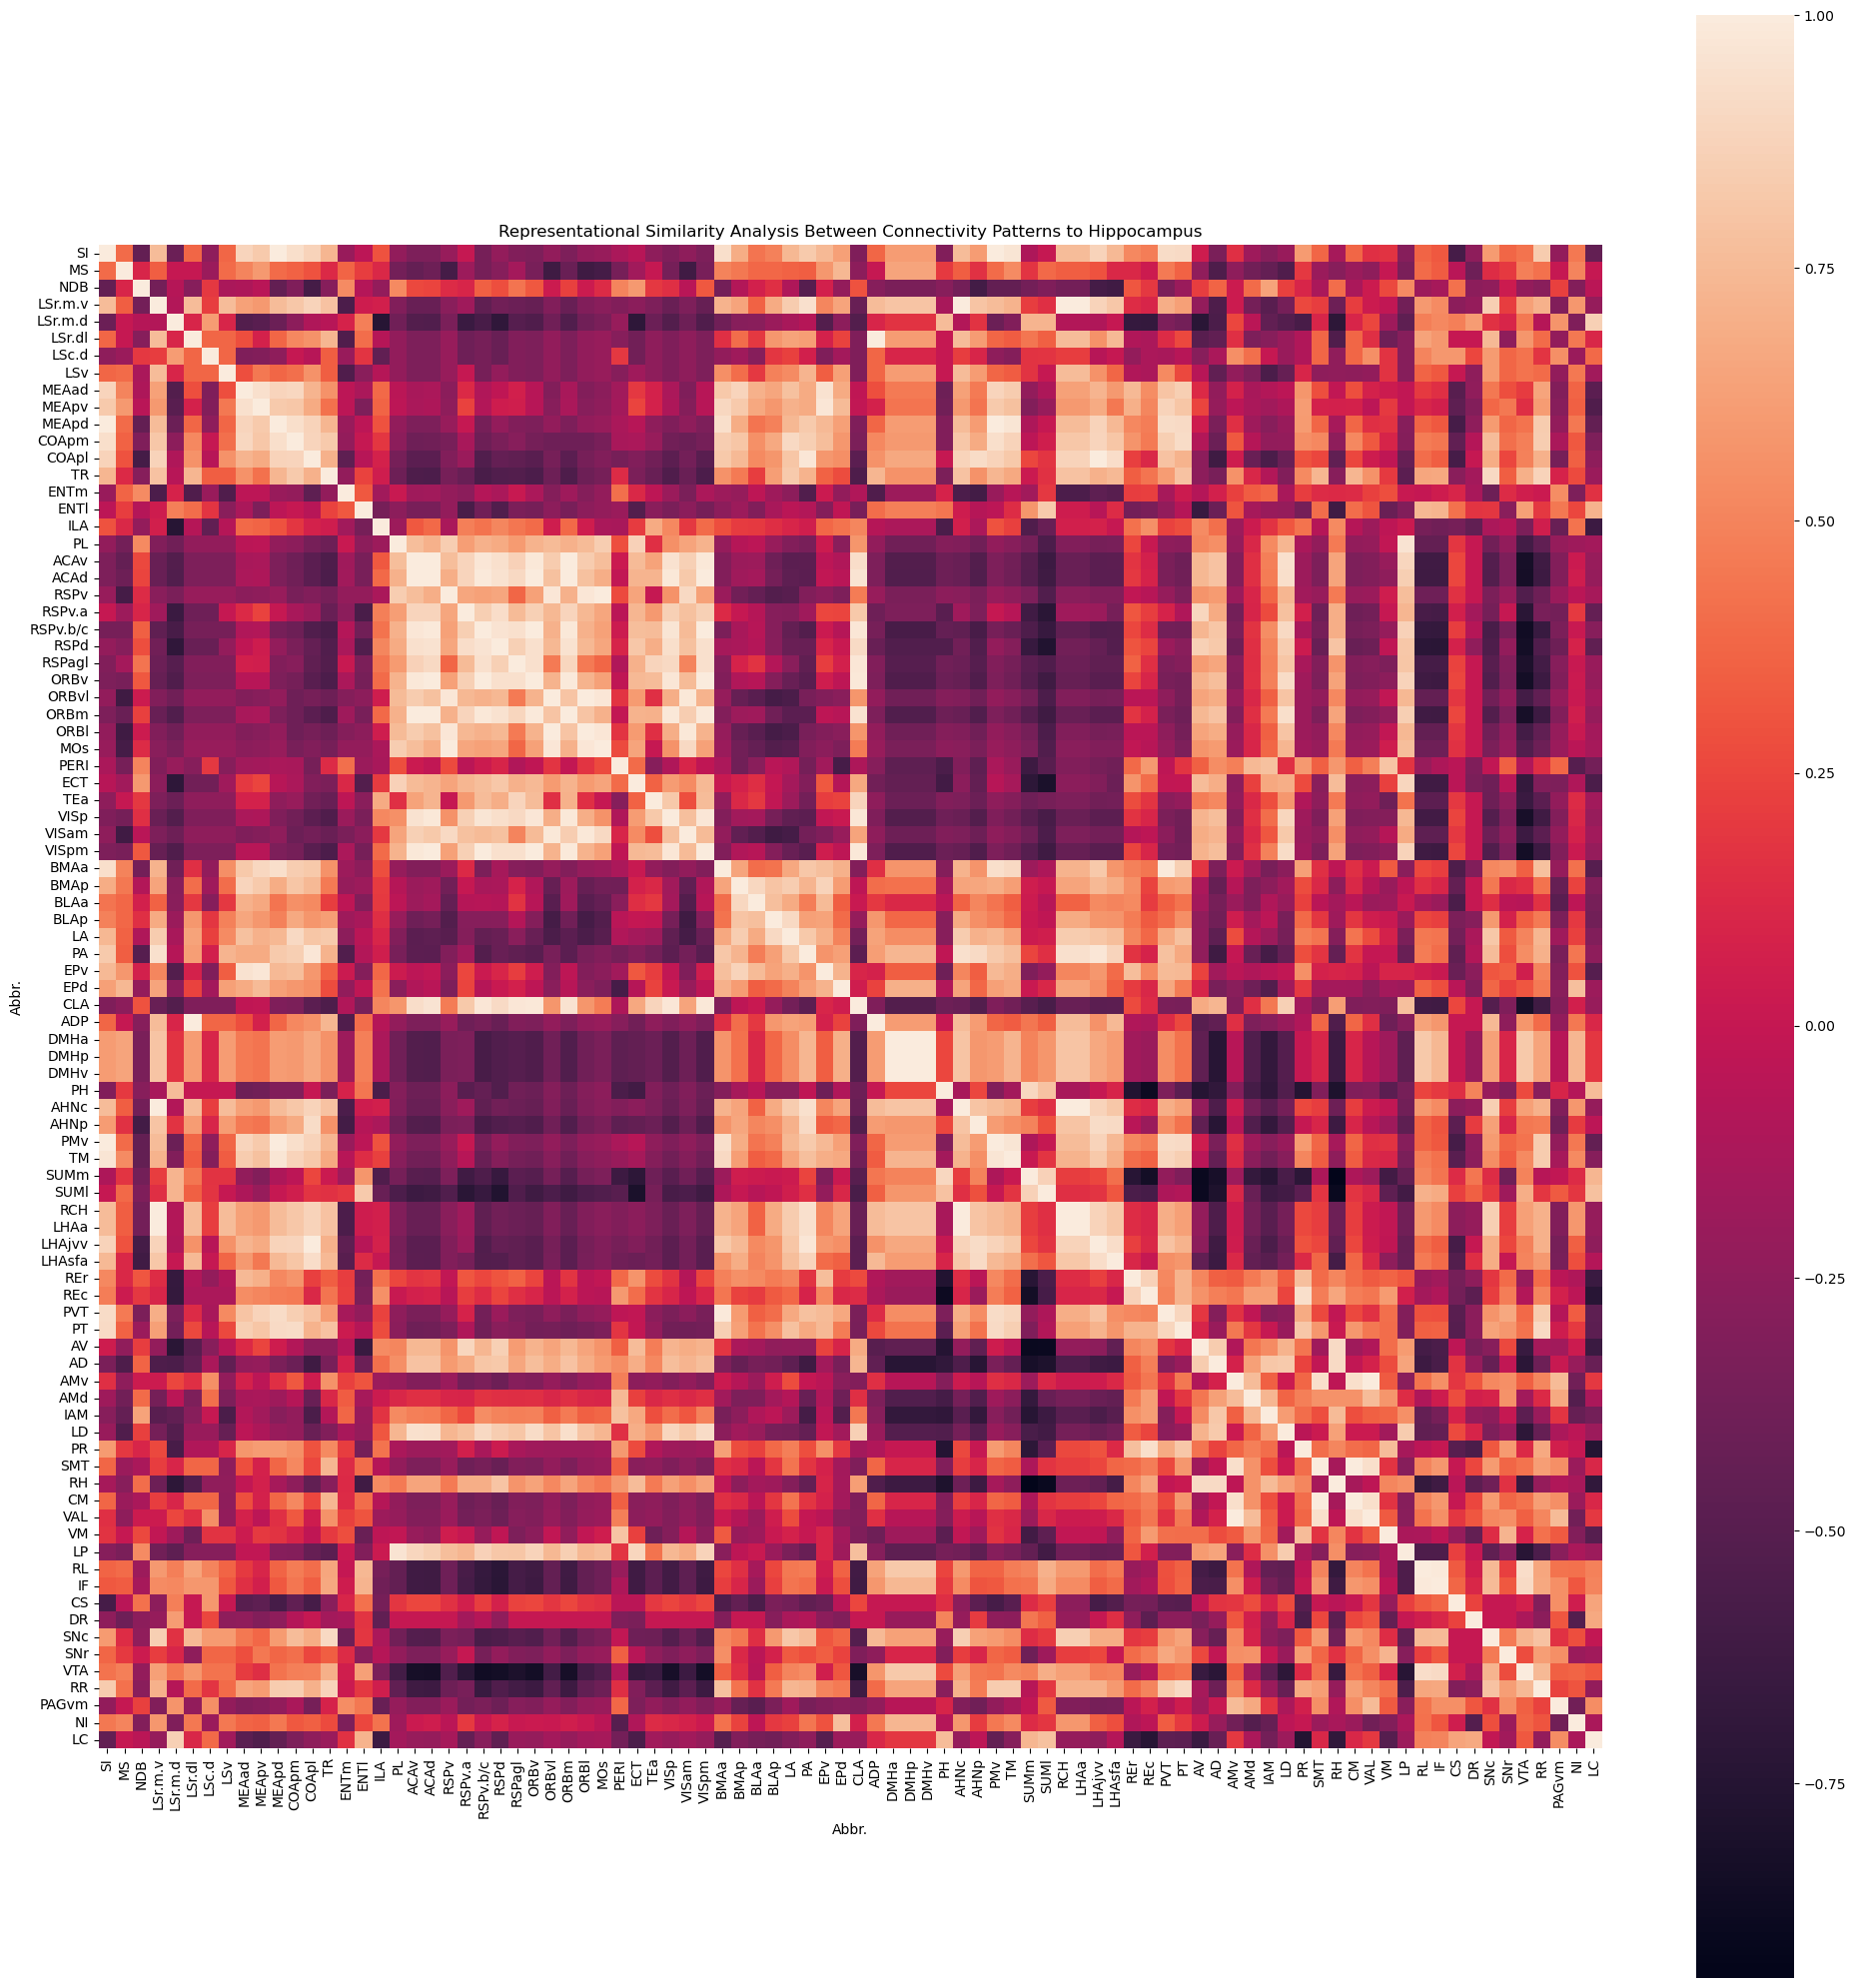

In [40]:
# plot heatmap of rsa using pearson correlation
plt.figure(figsize=(20, 20))
sns.heatmap(df_average_rsa_to, fmt=".2f", cbar=True, square=True, xticklabels=True, yticklabels=True)
plt.title("Representational Similarity Analysis Between Connectivity Patterns to Hippocampus")
plt.tight_layout()

# Save the heatmap as an SVG file
plt.savefig("../output/rsa_average_heatmap.svg", format="svg")

# Show the plot
plt.show()

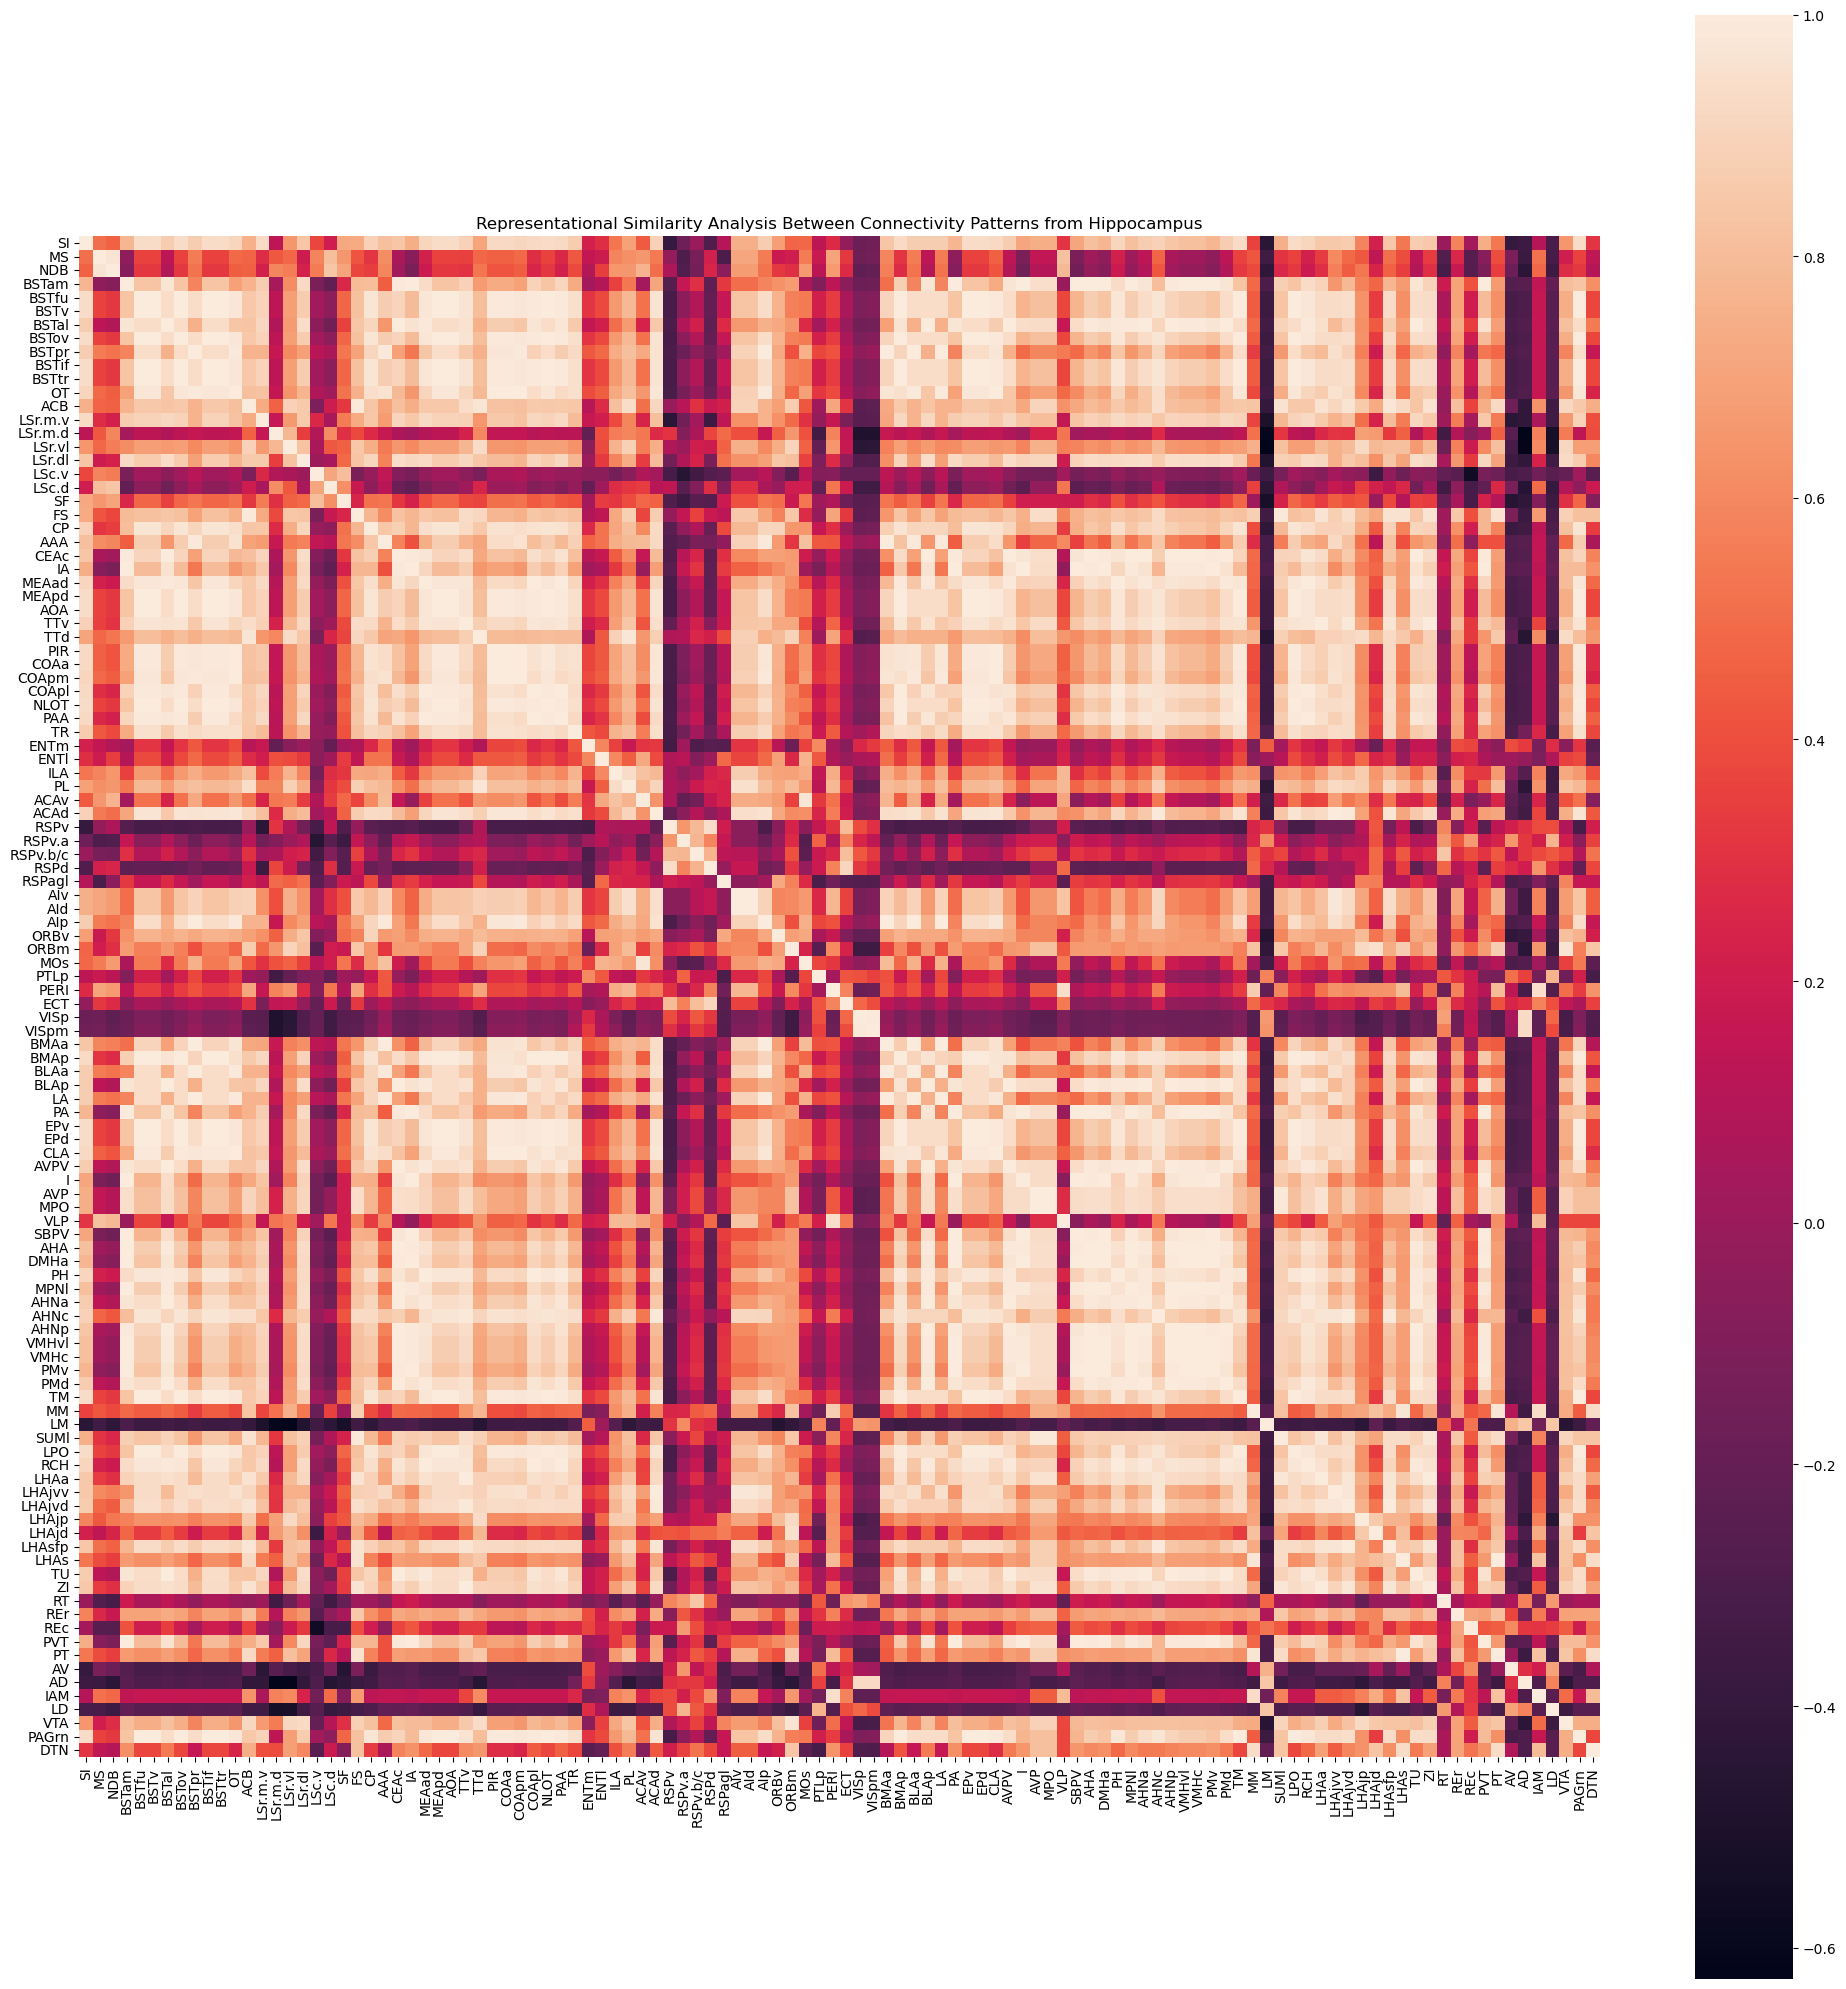

In [41]:
# plot heatmap of rsa using pearson correlation
plt.figure(figsize=(20, 20))
sns.heatmap(df_average_rsa_from, fmt=".2f", cbar=True, square=True, xticklabels=True, yticklabels=True)
plt.title("Representational Similarity Analysis Between Connectivity Patterns from Hippocampus")
plt.tight_layout()

# Save the heatmap as an SVG file
plt.savefig("../output/rsa_average_from_hippocampus_heatmap.svg", format="svg")

# Show the plot
plt.show()

In [42]:
# define brain regions and which subregions they contain
# Define brain regions and their groups
dissimilarity_matrix = 1 - df_average_rsa_to

# construct cortical
OLF_regions = np.array(['MOB','AOB','AOA','TTv','TTd','PIR','NLOT','TR'])
PARAH_regions = np.array(['IG','FC','ENTm','ENTl','PERI','ECT','CLA','6b'])
PFC_regions = np.array(['ILA','PL','ACAv','ACAd'])
ISU_regions = np.array(['AIv','AId','AIp'])
ORB_regions = np.array(['ORBv','ORBvl','ORBm','ORBl'])
PSM_regions = np.array(['MOp','MOs'])
SSR_regions = np.array(['SSp','SSs'])
AUD_regions = np.array(['AUDv','AUDp','AUDd','AUDpo'])
VIS_regions = np.array(['VISrl','VISal','VISlla','VISll','VISli','VISlm','VISpl','VISp','VISam','VISpm'])
EP_regions = np.array(['EPv','EPd'])
RSP_regions = np.array(['RSPv','RSPv.a','RSPv.b/c','RSPd','RSPagl'])
GVA_regions = np.array(['GU','VISC'])


cortical_regions = np.concatenate(
    (OLF_regions, PARAH_regions, PFC_regions, ISU_regions, ORB_regions, PSM_regions, SSR_regions, AUD_regions, VIS_regions, 
    EP_regions, RSP_regions, GVA_regions), axis=0
)

# hypothalamic regions
AHA_regions = np.array(['AHA', 'AHNa', 'AHNc', 'AHNp', 'AHNd'])
DHA_regions = np.array(['DMHa','DMHp','DMHv'])
mammillary_regions = np.array(['TM','MM','LM','SUMm','SUMl'])
LHA_regions = np.array([
    'LHAa','LHAjvv','LHAjvd','LHAjp','LHAjd','LHAsfa','LHAsfp','LHAs','LHAv','LHAd','LHAp'
])

hypothalamus_regions = np.concatenate(
    (AHA_regions, DHA_regions, mammillary_regions, LHA_regions), axis=0
)

# amygdala regions
CEA_regions = np.array(['CEAm','CEAl','CEAc'])
MEA_regions = np.array(['MEAav','MEAad','MEApv','MEApd'])
BST_regions = np.array([
    'BSTam','BSTfu','BSTv','BSTmg','BSTdm','BSTal','BSTov','BSTju','BSTrh','BSTpr','BSTif','BSTtr','BSTd','BSTse'
])

hippocampus_regions = np.array(['DG','CA3','CA2','CA1v','CA1d','PAR', 'SUBv'])

amygdala_non_aggregated_regions = np.array(['AAA','IA'])

amygdala_aggregated_regions = np.concatenate(
    (CEA_regions, MEA_regions, BST_regions), axis=0
)

# septal striatal regions
LS_aggregated_regions = np.array(['LSr.m.v','LSr.m.d','LSr.vl','LSr.dl','LSc.v','LSc.d','LSv'])

LS_non_aggregated_regions = np.array(['MS','NDB','ACB'])

hippocampus_regions = np.array(['DG','CA3','CA2','CA1v','CA1d','SUBv','SUBd','PAR', 'PRE', 'POST'])

septostri_regions = np.concatenate(
    (LS_aggregated_regions, LS_non_aggregated_regions), axis=0
)

regions = list(dissimilarity_matrix.index)

# Assign each region to a group
region_groups = {}
for region in regions:
    if region in cortical_regions:
        region_groups[region] = "Cortical"
    elif region in hypothalamus_regions:
        region_groups[region] = "Hypothalamus"
    elif region in amygdala_aggregated_regions:
        region_groups[region] = "Amygdala"
    elif region in septostri_regions:
        region_groups[region] = "Septal Striatum"
    else:
        region_groups[region] = "Other"

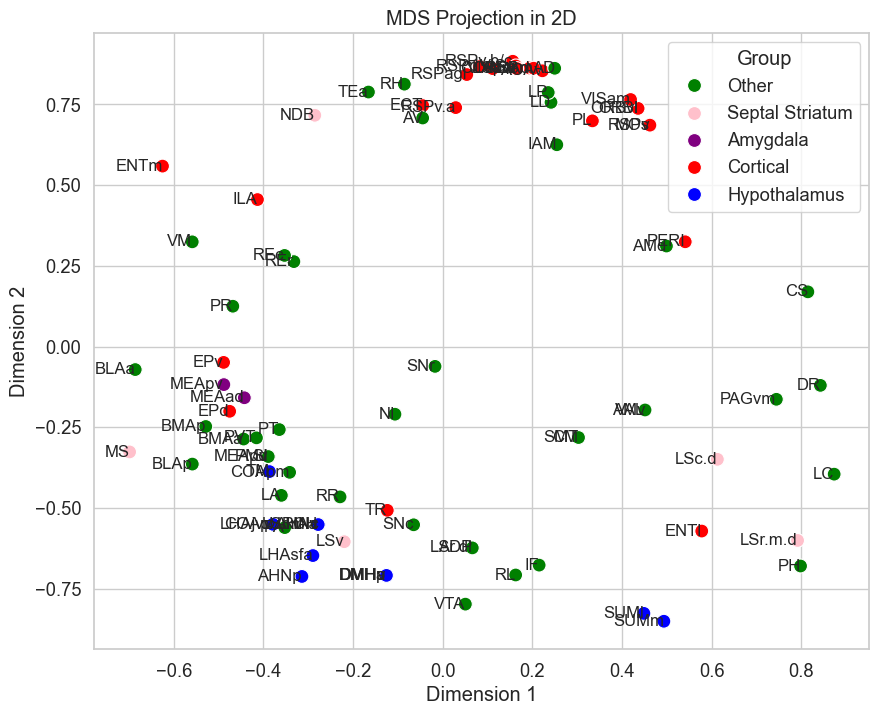

In [43]:
# do multidimensional scaling in 2D

dissimilarity_matrix = 1 - df_average_rsa_to

# Perform MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
embedding = mds.fit_transform(dissimilarity_matrix)

# Create a DataFrame for the results
mds_results = pd.DataFrame(embedding, columns=['Dim1', 'Dim2'], index=dissimilarity_matrix.index)
mds_results['Group'] = mds_results.index.map(region_groups)


# Plot the results
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Plot the results in 3D
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Dim1', y='Dim2', 
    data=mds_results, 
    hue='Group',  # Group coloring
    palette={'Cortical': 'red', 'Hypothalamus':'blue', 'Amygdala': 'purple', "Septal Striatum": 'pink','Other': 'green'}, 
    s=100, 
    marker='o'
)

# Annotate each point with its label
for label, (x, y, z) in mds_results.iterrows():
    plt.text(x, y, label, fontsize=12, ha='right', va='center')

# Add labels and title
plt.title("MDS Projection in 2D")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")


plt.savefig("../output/MDS_2D_projection.svg", format="svg")
# Show the plot
plt.show()

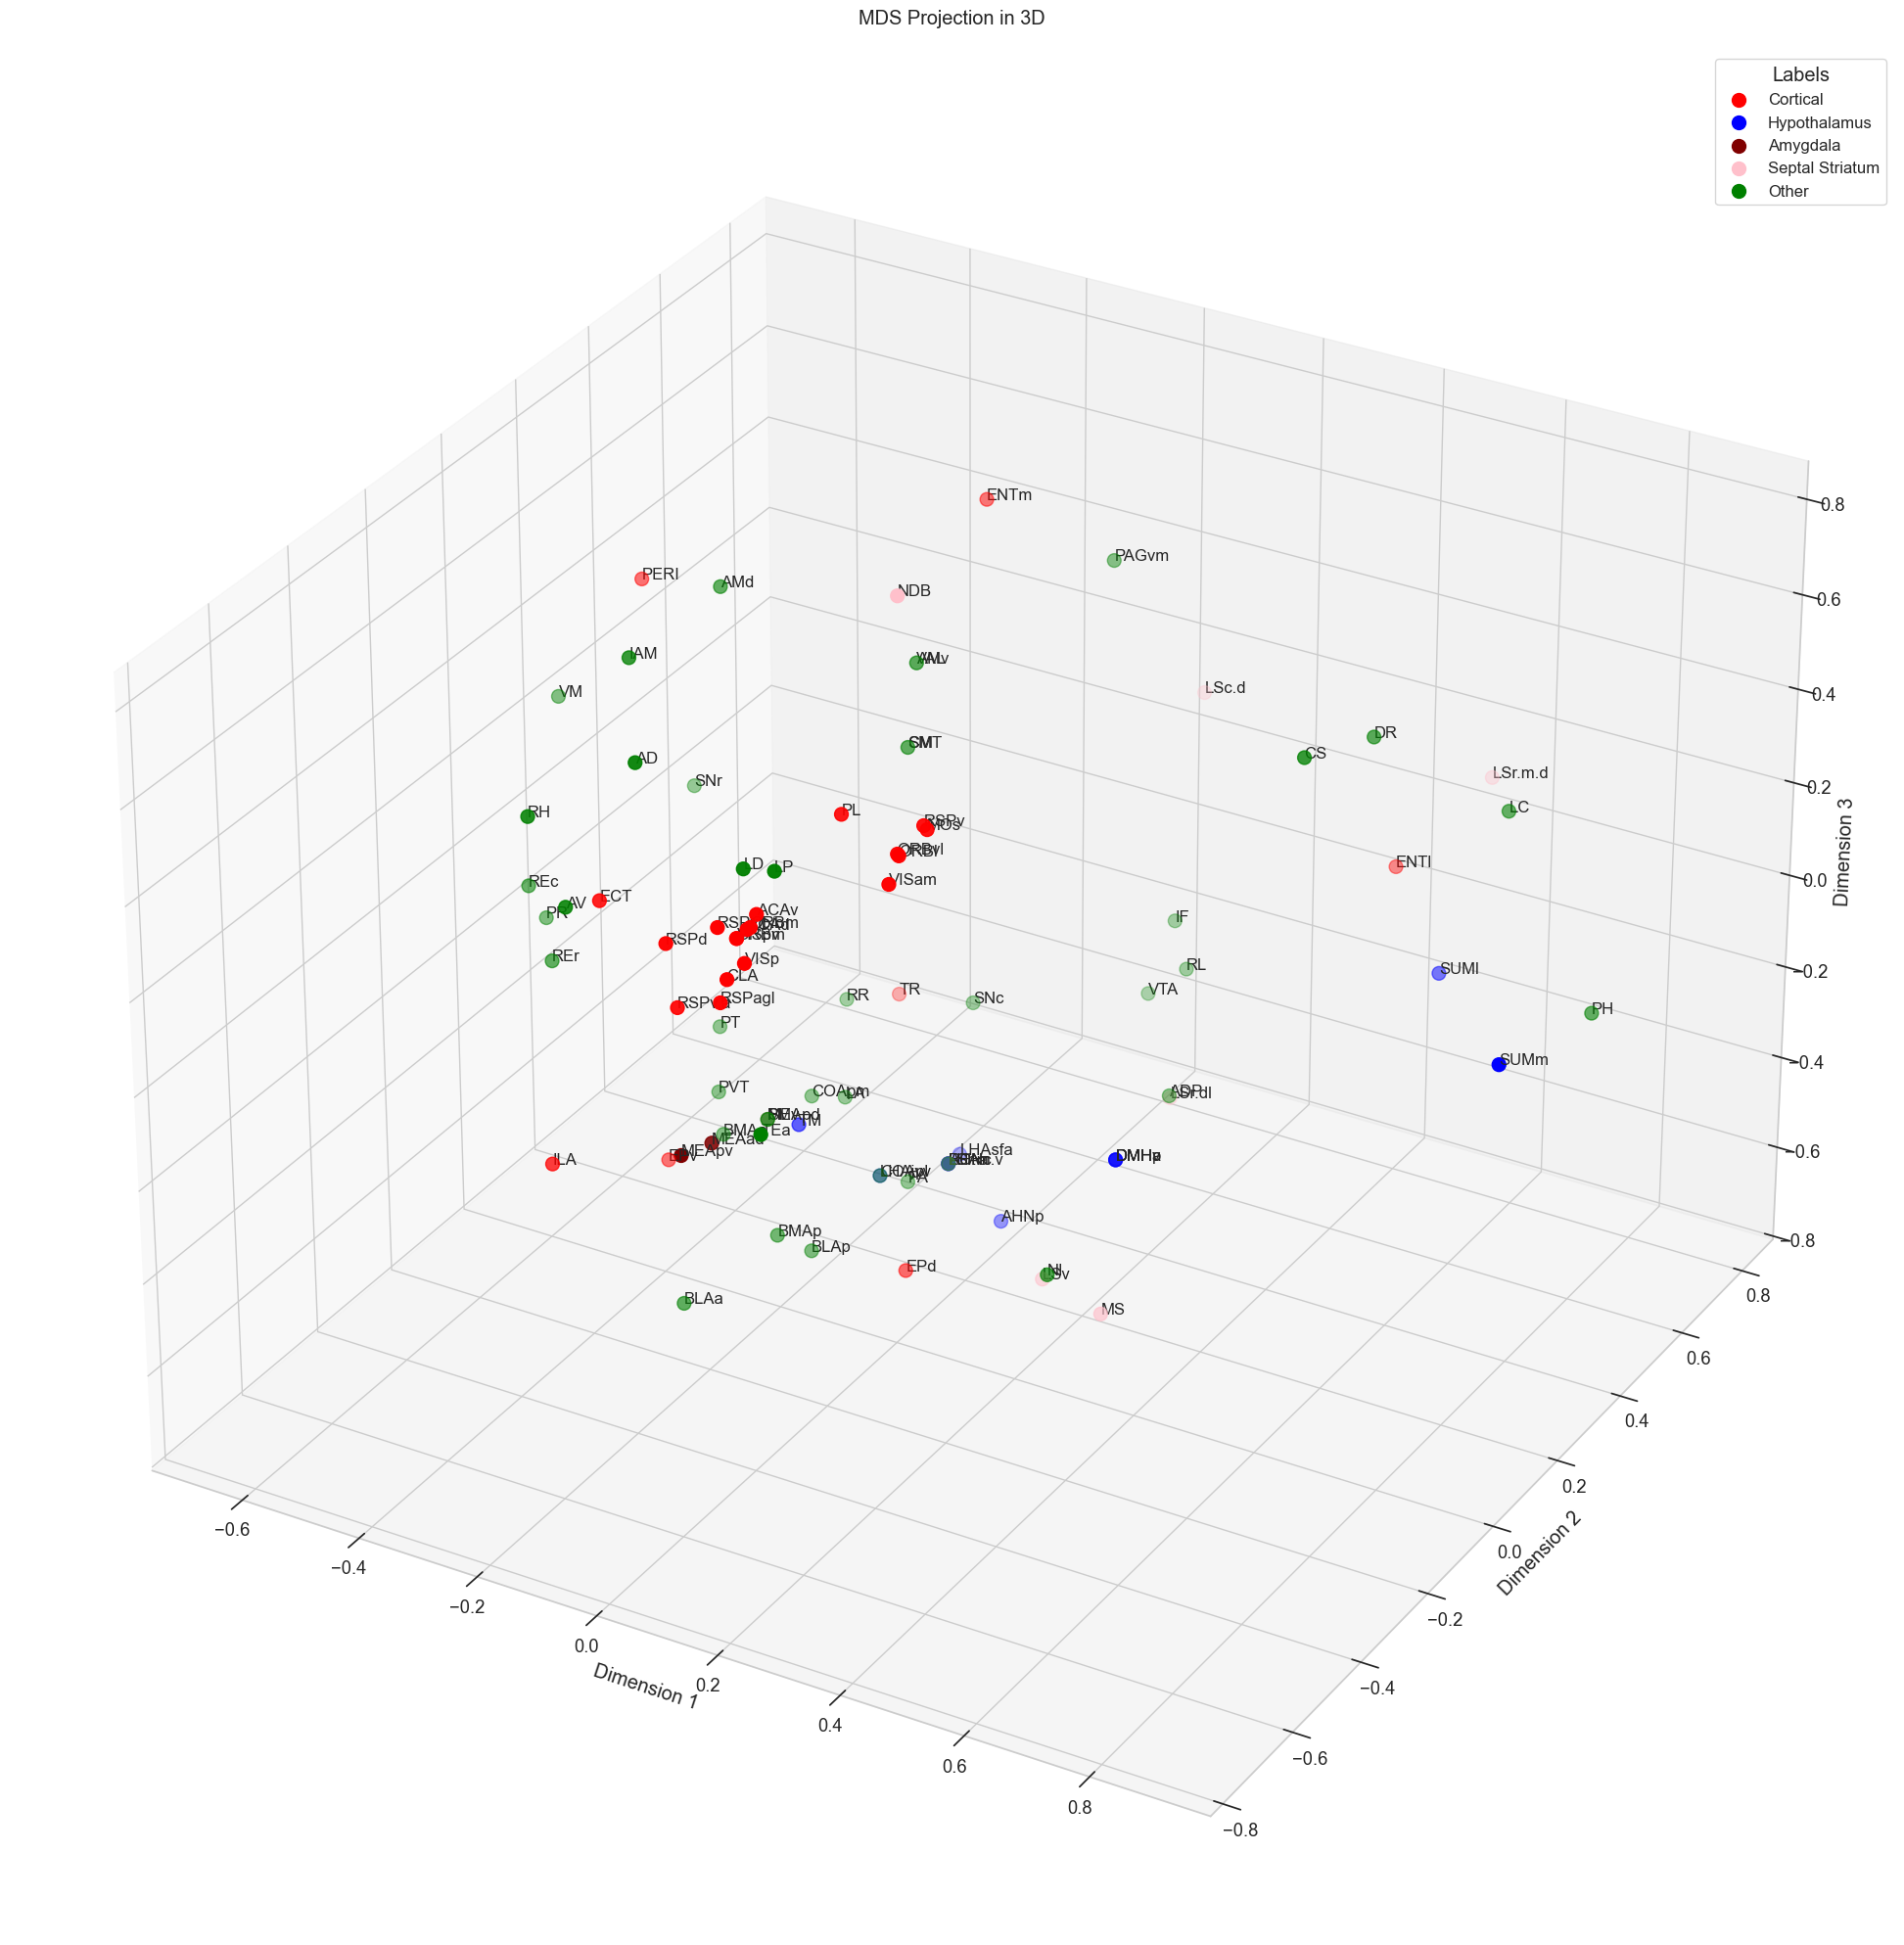

In [55]:
# next do multidimensional scaling for this

#MDS requires dissimilarity matrix
dissimilarity_matrix = 1 - df_average_rsa_to

# Perform MDS
mds = MDS(n_components=3, dissimilarity='precomputed', random_state=42)
embedding = mds.fit_transform(dissimilarity_matrix)

# Create a DataFrame for the results
mds_results = pd.DataFrame(embedding, columns=['Dim1', 'Dim2', 'Dim3'], index=dissimilarity_matrix.index)
mds_results['Group'] = mds_results.index.map(region_groups)

# # Plot the results
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Plot the results in 3D
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111, projection='3d')

palette = {'Cortical': 'red', 'Hypothalamus':'blue', 'Amygdala': 'maroon', "Septal Striatum": 'pink','Other': 'green'}

for group, color in palette.items():
    group_data = mds_results[mds_results['Group'] == group]
    ax.scatter(
        group_data['Dim1'], 
        group_data['Dim2'], 
        group_data['Dim3'], 
        label=group, 
        color=color, 
        s=100
    )
    
for label, (x, y, z, group) in mds_results.iterrows():
    ax.text(x, y, z, label, fontsize=12)

# Add axis labels and title
ax.set_title("MDS Projection in 3D", pad=20)
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")

# Customize the legend
ax.legend(title="Labels", loc="best", fontsize=12)

plt.savefig("../output/MDS_3D_projection.svg", format="svg")

plt.show()

In [44]:
for boop in mds_results.iterrows():
    print(boop)
    break

('SI', Dim1    -0.261512
Dim2     0.070026
Dim3    -0.460967
Group       Other
Name: SI, dtype: object)


In [156]:
df_average_rsa_high_connectivity

Abbr.,SI,MS,NDB,LSr.m.v,LSr.m.d,LSr.dl,LSc.d,LSv,MEAad,MEApv,...,IF,CS,DR,SNc,SNr,VTA,RR,PAGvm,NI,LC
Abbr.,,,,,,,,,,,,,,,,,,,,,
SI,1.000000,3.952847e-01,-0.443607,0.763763,-4.082483e-01,3.750000e-01,-0.250000,0.375000,0.880705,0.829156,...,0.317999,-0.583874,-0.250000,0.602216,0.375000,0.426798,0.836428,-2.342606e-01,0.448129,-4.444444e-01
MS,0.395285,1.000000e+00,0.100201,0.345033,1.688099e-16,8.143183e-17,-0.197642,0.395285,0.506370,0.595914,...,0.335201,-0.061546,-0.395285,0.136027,0.197642,0.482019,0.417635,6.183606e-17,0.506110,1.193033e-16
NDB,-0.443607,1.002006e-01,1.000000,-0.373383,-7.761505e-02,-2.851759e-01,0.190117,-0.126745,-0.111625,-0.057323,...,-0.141067,0.419351,-0.253490,-0.239887,0.031686,-0.227969,-0.273402,2.276335e-01,-0.300218,-4.928966e-02
LSr.m.v,0.763763,3.450328e-01,-0.373383,1.000000,-8.908708e-02,7.637626e-01,0.218218,0.763763,0.628971,0.592157,...,0.532014,-0.254824,-0.218218,0.851064,0.218218,0.625334,0.710882,-3.067192e-01,0.586739,-2.182179e-01
LSr.m.d,-0.408248,1.688099e-16,-0.077615,-0.089087,1.000000e+00,1.020621e-01,0.612372,0.102062,-0.522976,-0.492366,...,0.519291,0.476731,0.612372,0.163903,0.102062,0.448044,-0.071889,5.738190e-01,-0.313625,8.618575e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VTA,0.426798,4.820187e-01,-0.227969,0.625334,4.480441e-01,5.792252e-01,0.426798,0.426798,0.205027,0.147068,...,0.911272,0.071199,-0.121942,0.720368,0.274370,1.000000,0.746180,3.523170e-01,0.366908,3.184045e-01
RR,0.836428,4.176345e-01,-0.273402,0.710882,-7.188852e-02,3.962029e-01,0.176090,0.396203,0.648531,0.610572,...,0.662626,-0.308444,-0.264135,0.787758,0.616316,0.746180,1.000000,2.337557e-01,0.304372,-2.250041e-01
PAGvm,-0.234261,6.183606e-17,0.227634,-0.306719,5.738190e-01,-2.342606e-01,0.546608,-0.234261,-0.300094,-0.282529,...,0.546295,0.547115,0.312348,0.161229,0.546608,0.352317,0.233756,1.000000e+00,-0.379924,5.379318e-01


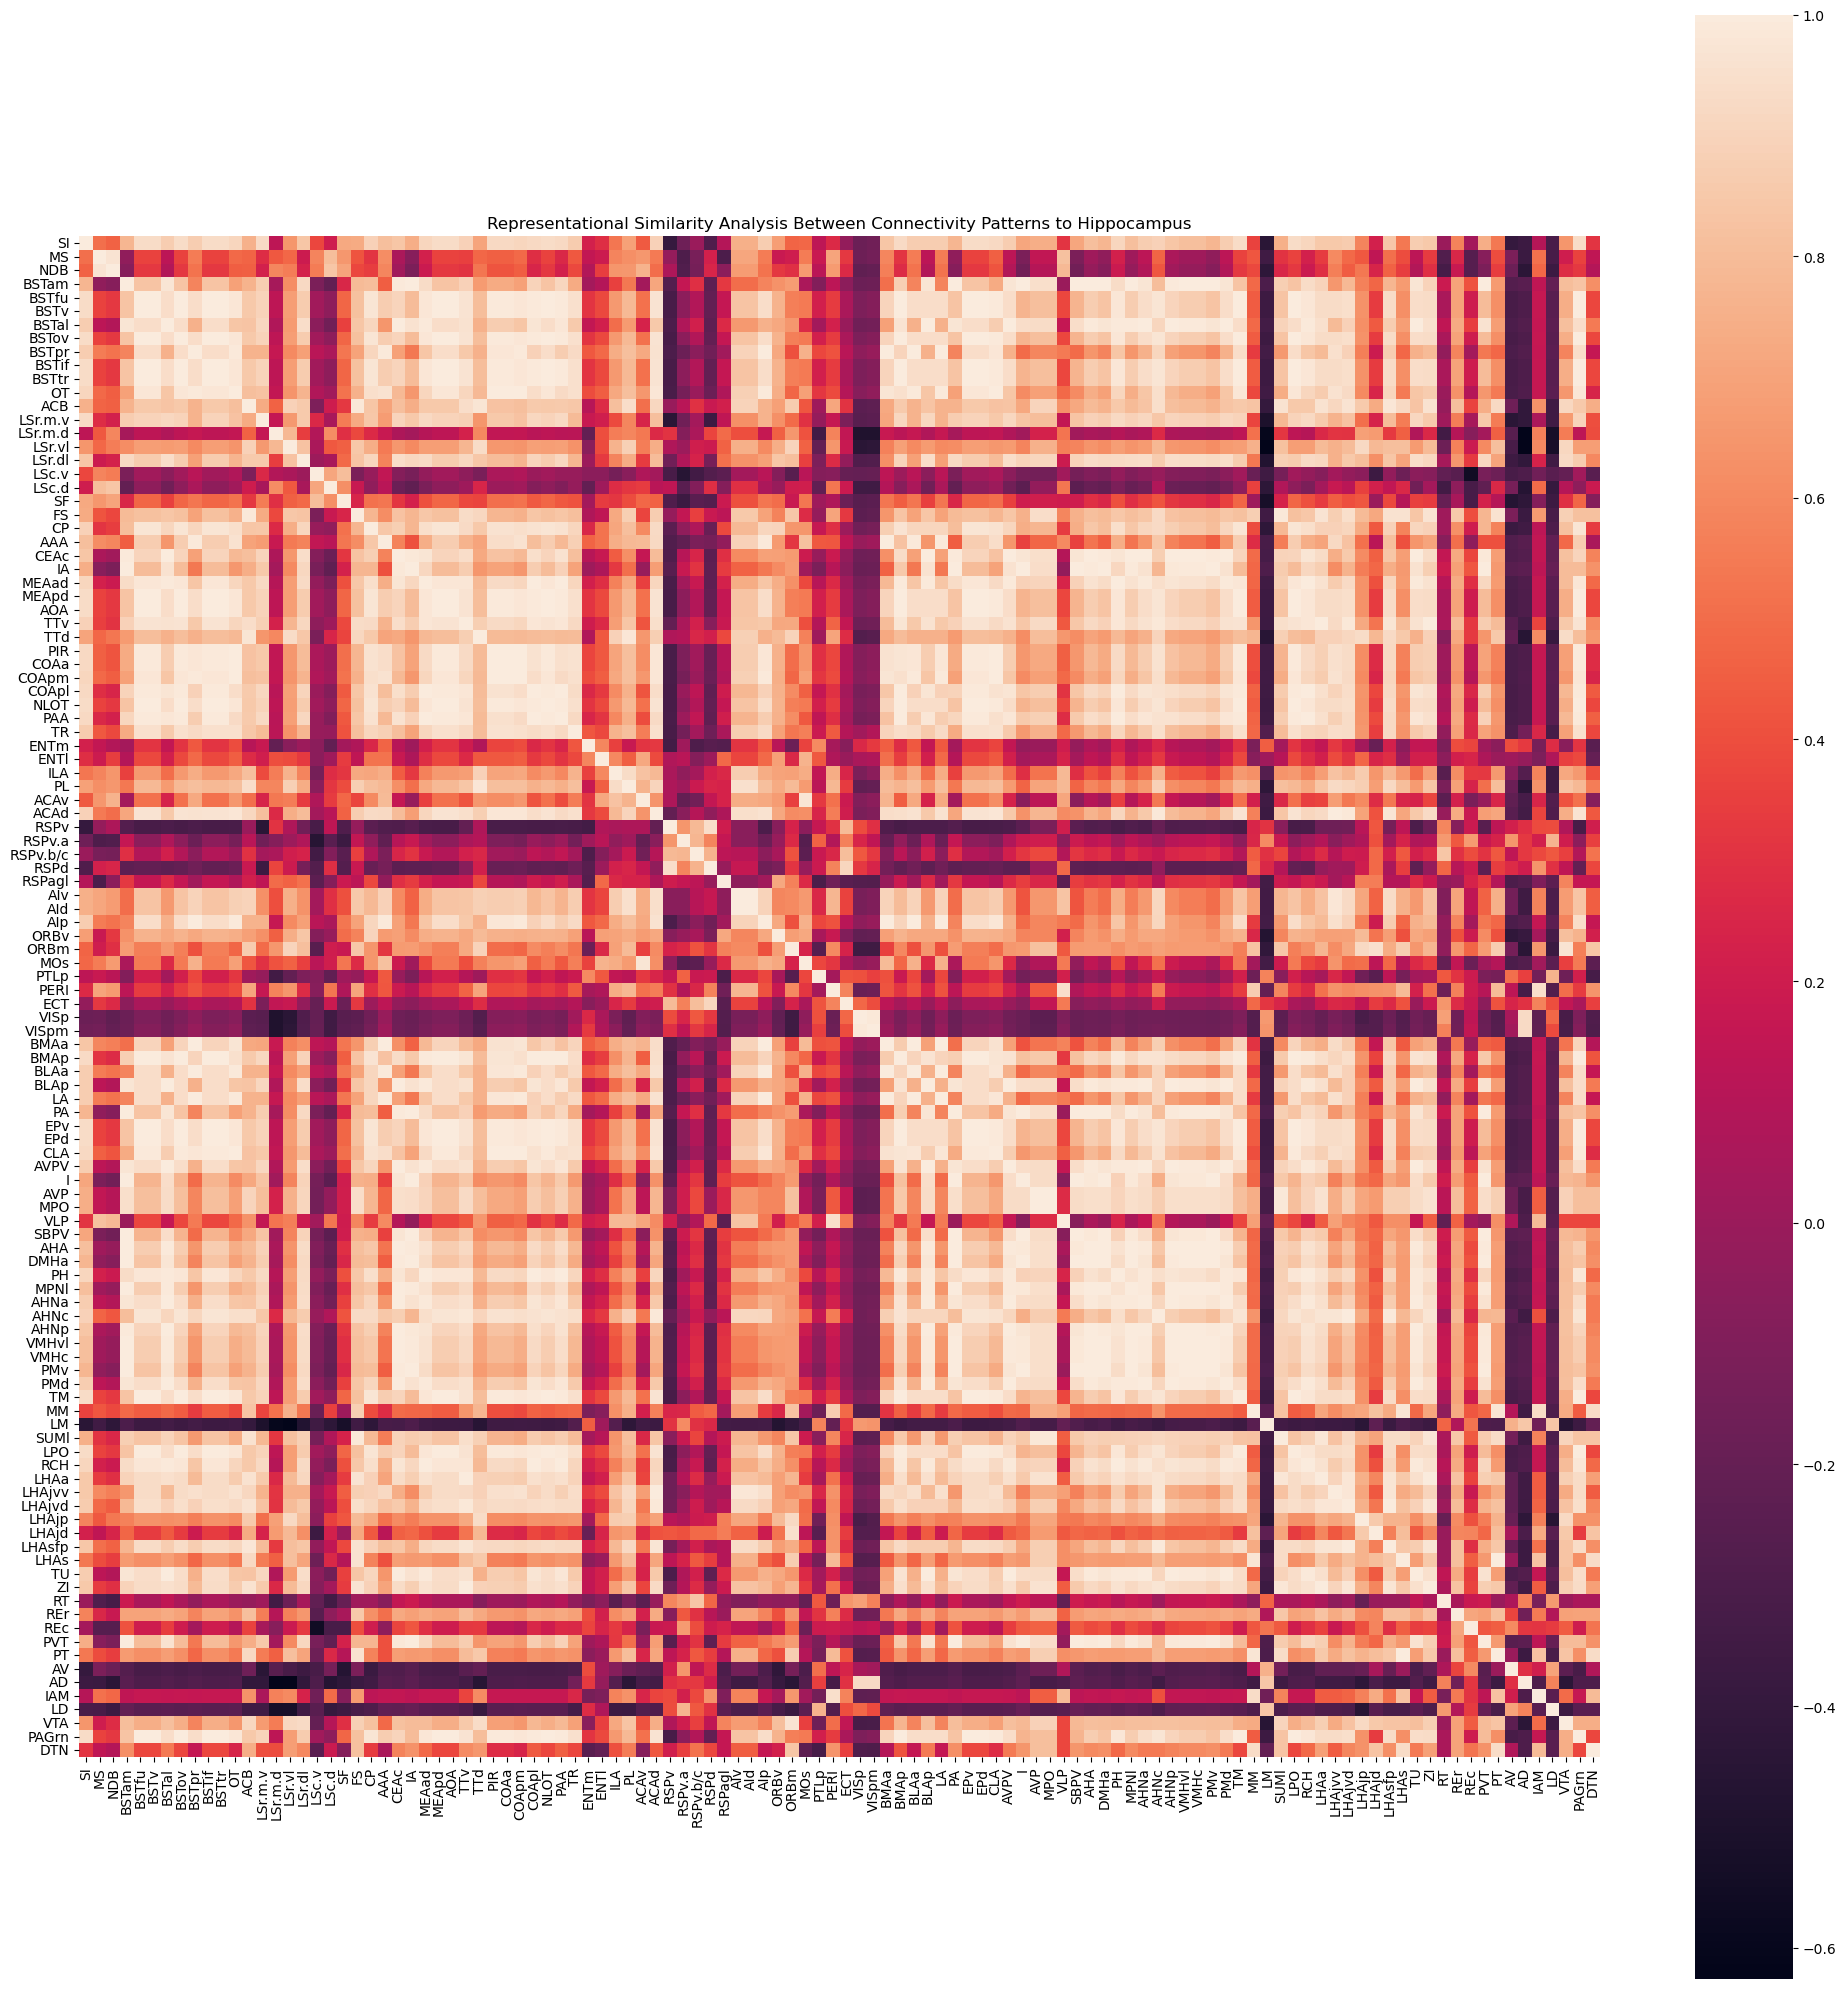

In [51]:
# plot heatmap of rsa using pearson correlation
plt.figure(figsize=(20, 20))
sns.heatmap(rsa_matrix, fmt=".2f", cbar=True, square=True, xticklabels=True, yticklabels=True)
plt.title("Representational Similarity Analysis Between Connectivity Patterns to Hippocampus")
plt.tight_layout()

# Save the heatmap as an SVG file
plt.savefig("../output/rsa_heatmap.svg", format="svg")

# Show the plot
plt.show()

In [48]:
# construct rsa matrix using euclidean distance
# Compute pairwise Euclidean distances between columns
distance_matrix = squareform(pdist(df_filtered.T, metric='euclidean'))

# Convert to a pandas DataFrame for better visualization
distance_df = pd.DataFrame(distance_matrix, index=df_filtered.columns, columns=df_filtered.columns)

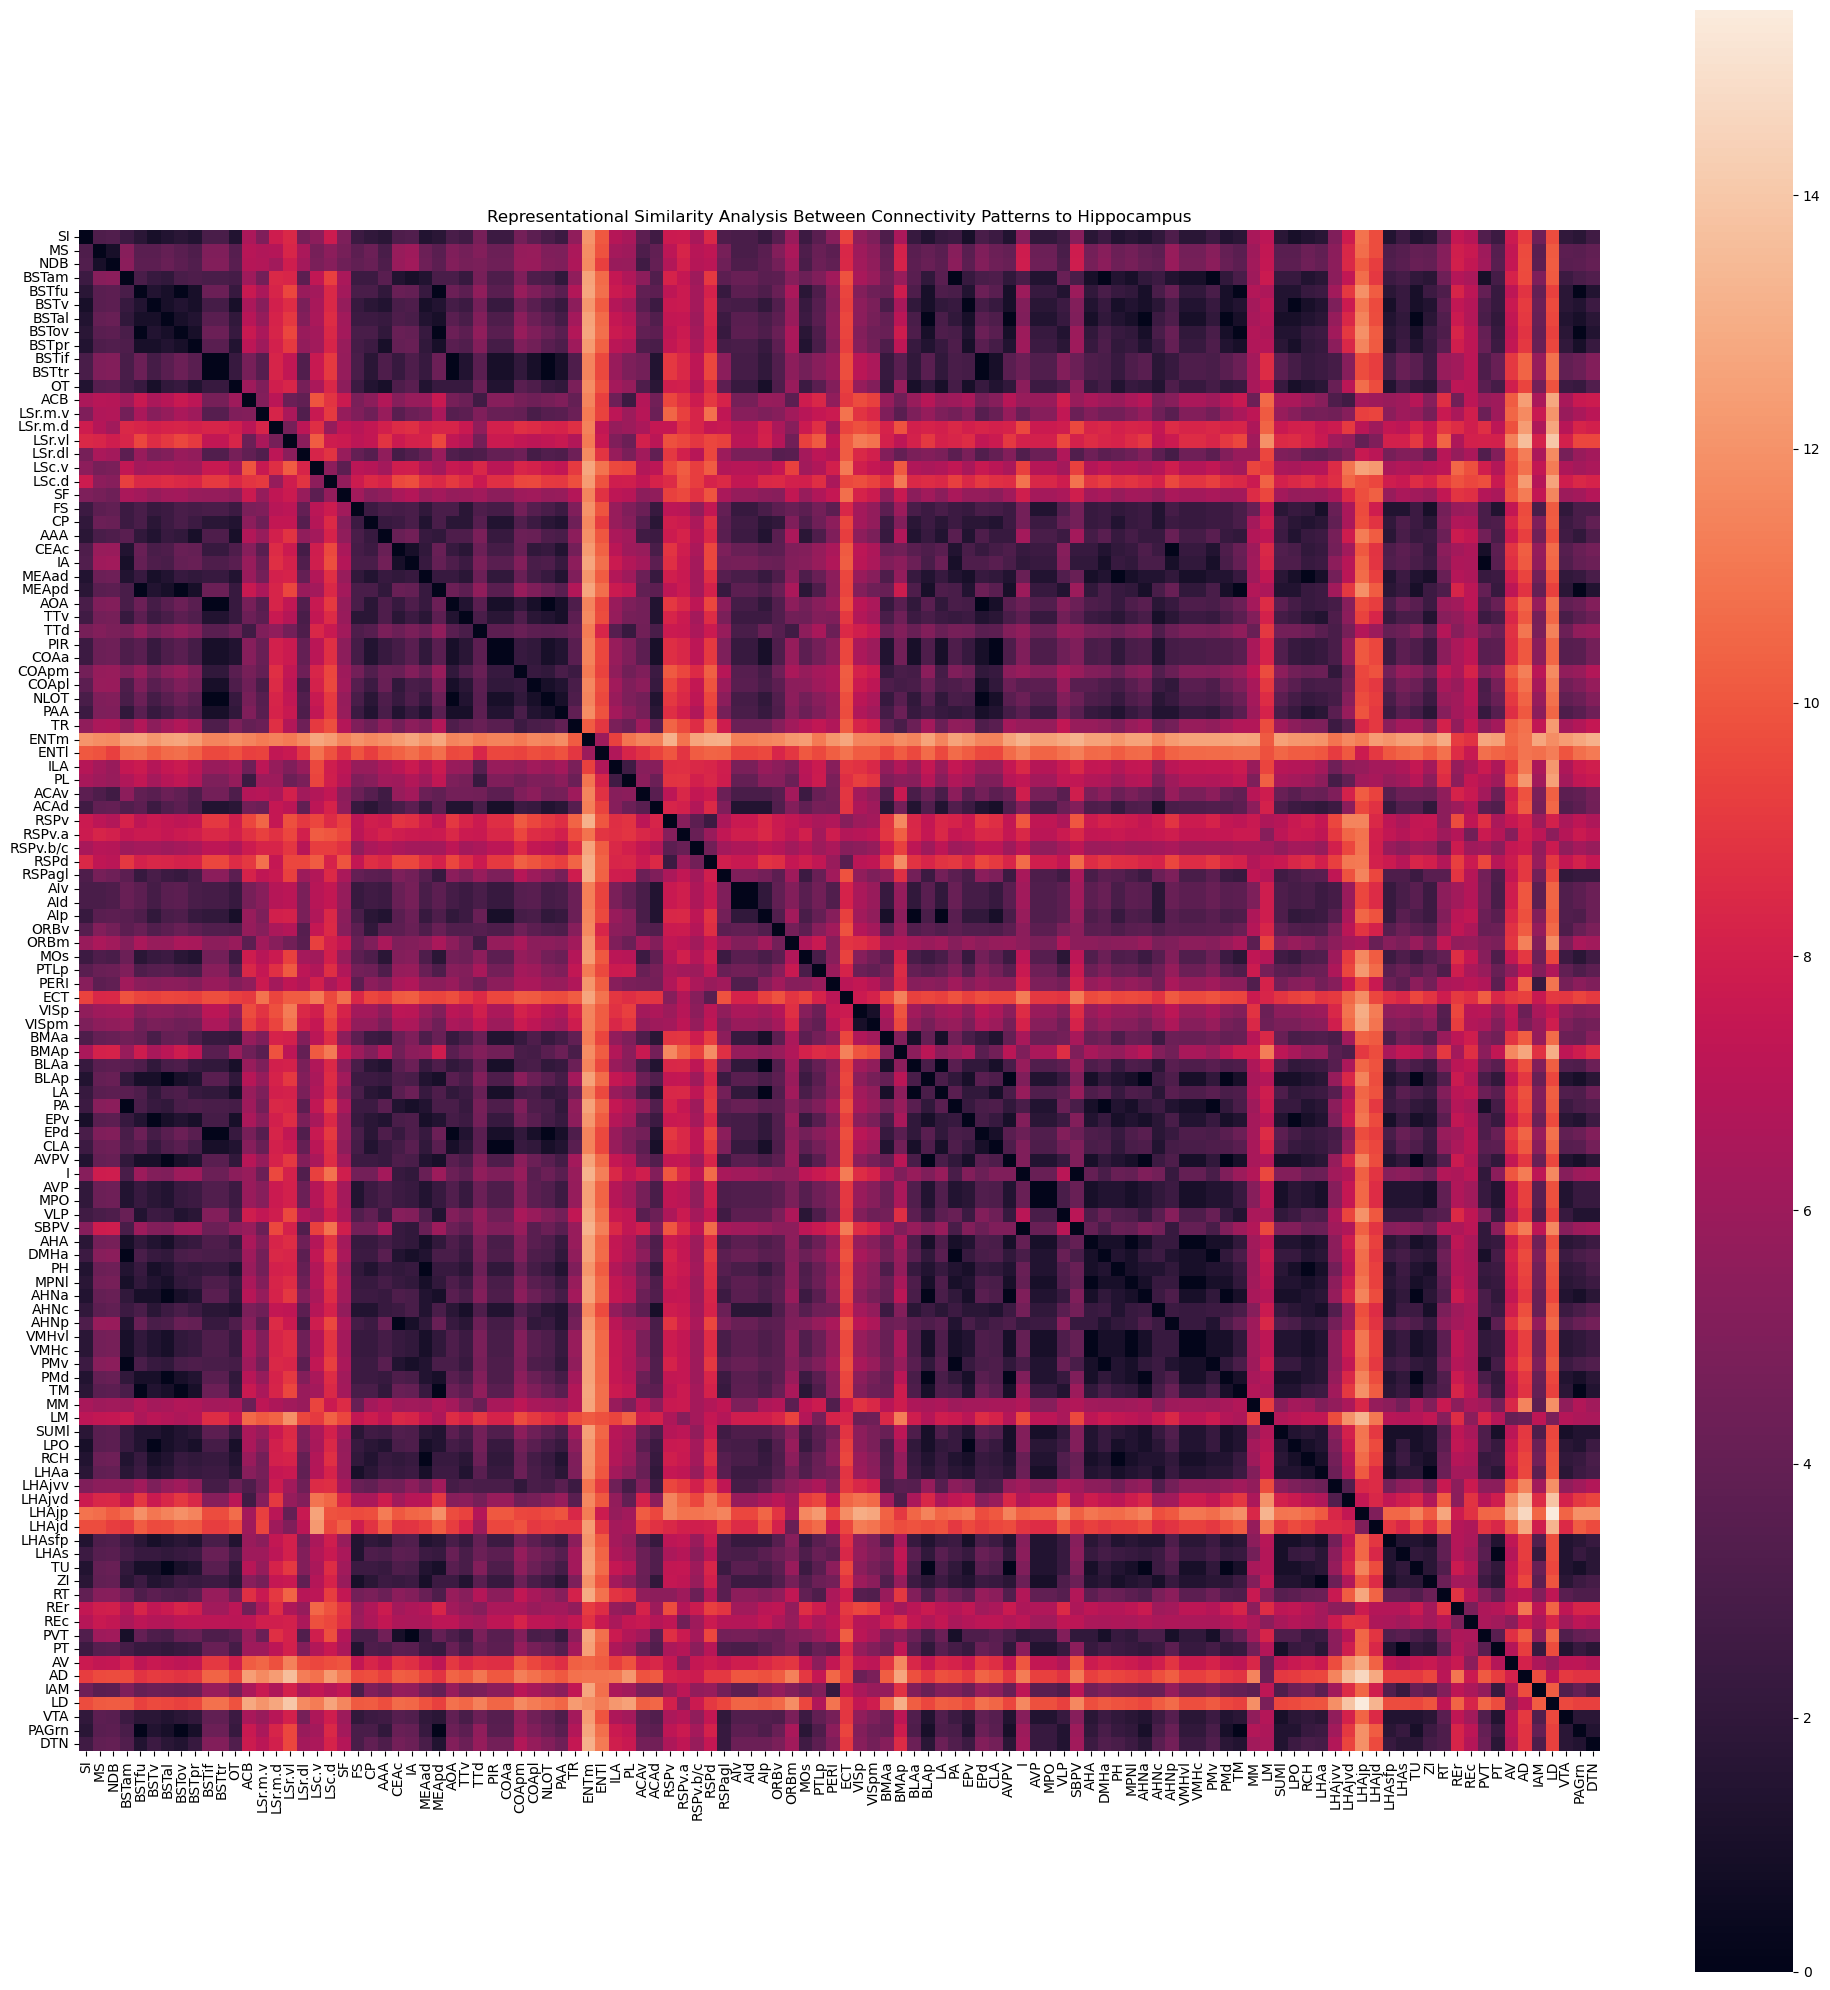

In [50]:
# plot heatmap of rsa using euclidean distance
plt.figure(figsize=(20, 20))
sns.heatmap(distance_df, fmt=".2f", cbar=True, square=True, xticklabels=True, yticklabels=True)
plt.title("Representational Similarity Analysis Between Connectivity Patterns to Hippocampus")
plt.tight_layout()

# Save the heatmap as an SVG file
plt.savefig("../output/rsa_heatmap_euclidean_distance.svg", format="svg")

# Show the plot
plt.show()